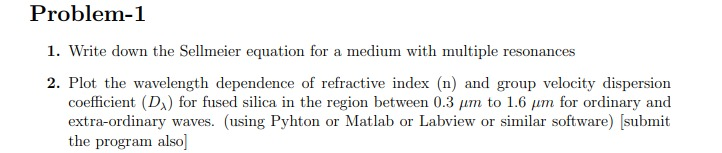



## Sellmeier equation for refractive index of fused silica


-




\begin{equation}
\eta(\lambda) = \sqrt{1 + \frac{0.6961663\lambda^2}{\lambda^2 - 0.0684043^2} + \frac{0.4079426\lambda^2}{\lambda^2 - 0.1162414^2} + \frac{0.8974794\lambda^2}{\lambda^2 - 9.96161^2}}
\end{equation}

-

where $\lambda$ is the wavelength of light in micrometers ($\mu m$) and $\eta(\lambda)$ is the refractive index of fused silica at that wavelength.



-


In [10]:
import numpy as np
import matplotlib.pyplot as plt

"""This Python code calculates and plots the refractive index and group velocity dispersion coefficient 
parameter of fused silica using the Sellmeier equation.

The Sellmeier equation for the refractive index of fused silica is defined in the function sellmeier_fs, 
--which takes an input array lmbda of wavelengths and returns an array of refractive indices calculated 
using the Sellmeier equation.

-The function deriv_func calculates the second derivative of a given array of values using the forward 
finite difference method. The array of wavelengths lmbds is used to calculate the refractive index and
group velocity dispersion parameter.

The group velocity dispersion parameter D_l is calculated using the Sellmeier equation and the second 
-derivative calculated using deriv_func. The final plot shows the refractive index and group velocity 
dispersion parameter on two subplots side by side using the matplotlib library."""

def sellm(lm):
    return np.sqrt(1 + (0.6961663 * lm**2 / (lm**2 - 0.0684043**2)) + (0.4079426 * lm**2 / (lm**2 - 0.1162414**2)) + (0.8974794 * lm**2 / (lm**2 - 9.96161**2)))

## The Finite Difference Approximation 


(FDA) method is a numerical method used to approximate the derivative of a function. It is based on the idea of approximating the slope of the tangent line to a curve at a particular point using nearby points. The FDA method involves taking the difference between two points on a function and dividing it by the distance between those two points. This approximation becomes more accurate as the distance between the points becomes smaller.

The forward finite difference approximation (FDA) formula for the derivative of a function $f(x)$ at a point $x_i$ can be written as:


\begin{equation}
f'(x_i) \approx \dfrac{f(x_{i+1}) - f(x_i)}{h}
\end{equation}


where $h$ is the step size, or the distance between the two points.



The FDA method can be used to approximate derivatives of any order by taking multiple differences of the function. Higher-order approximations can be more accurate but can also be more computationally intensive.


-

In [11]:
def deriv_func(f):
    der_f = []
    for i in range(len(f) - 1):
        
        der_f.append((f[i + 1] - f[i]) / 0.0001)
    return der_f

lmbds = np.linspace(0.3, 1.6, 10000)

# Calculate refractive index using Sellmeier equation
sell_fus = sellm(lmbds)

## Group velocity 


The group velocity, denoted by v_g, is the velocity at which the envelope of a wave packet propagates through a medium. It can be expressed in terms of the wavelength, denoted by λ, as:

\begin{equation}
v_g = \frac{1}{\frac{d\omega}{dk}}
\end{equation}

where ω is the angular frequency of the wave and k is its wave vector. The relationship between ω and k is given by the wave equation for the specific type of wave under consideration.

For example, for a plane wave in vacuum, ω = ck, where c is the speed of light. Therefore,

\begin{equation}
v_g = \left(\frac{d\omega}{dk}\right)^{-1} = \left(\frac{d(ck)}{dk}\right)^{-1} = c
\end{equation}

So for a plane wave in vacuum, the group velocity is equal to the speed of light and is independent of the wavelength. However, for other types of waves and in different media, the group velocity canwith wavelength.

## Group velocity dispersion Coefficient


-
\begin{equation}
D_\lambda = \left(\frac{\lambda^3}{c^2}\right)  \left(\frac{d^2(n)}{d\lambda ^2}\right)
\end{equation}



-

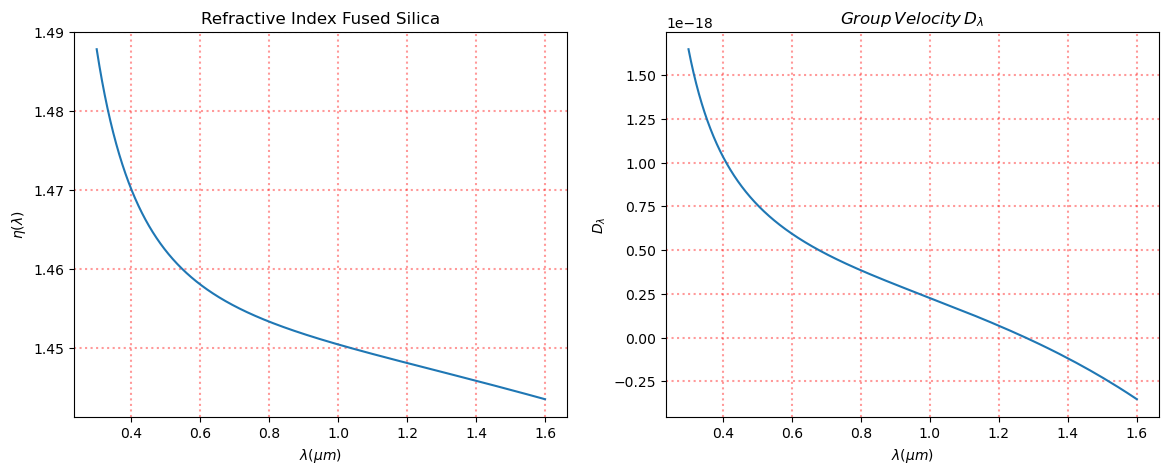

In [12]:
# Calculate group velocity dispersion parameter D_lambda using Sellmeier equation
D_l = deriv_func(deriv_func(sell_fus)) * lmbds[:-2]**3 / (9e16)

plt.figure(figsize = (14, 5))
plt.subplot(1, 2, 1)
plt.plot(lmbds, sell_fus)
plt.title("Refractive Index Fused Silica")
plt.xlabel(r"$\lambda (\mu m )$")
plt.ylabel(r"$\eta(\lambda)$")
plt.grid(True, which='both', linestyle=':', color='red', linewidth=1.5, alpha=0.4)

plt.subplot(1, 2, 2)
plt.plot(lmbds[:-2], D_l)
plt.title(r"$Group \,Velocity \,D_{\lambda}$ ")
plt.xlabel(r"$\lambda (\mu m )$") # Use LaTeX formatting for axis label
plt.ylabel(r"$D_{\lambda}$")
plt.grid(True, which='both', linestyle=':', color='red', linewidth=1.5, alpha=0.4)

plt.show()

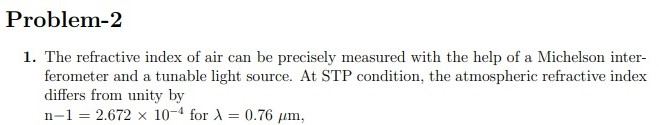

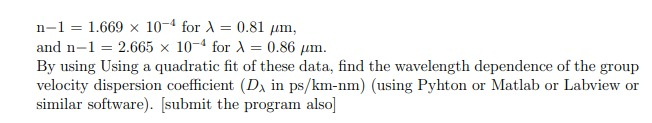


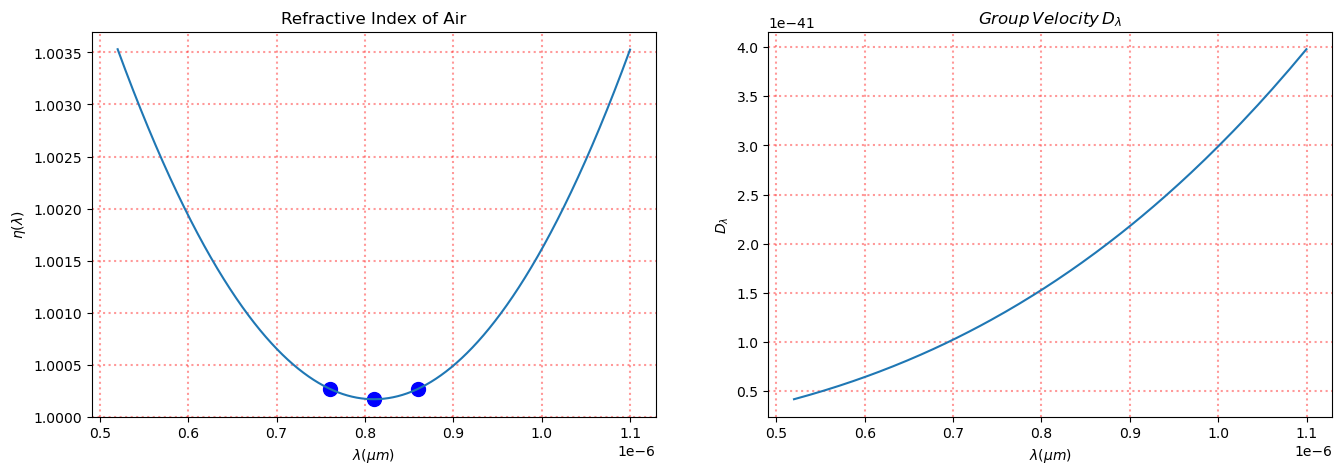

In [13]:
import numpy as np
import matplotlib.pyplot as plt

""" The provided code is plotting the refractive index of air as a function of wavelength,
along with the group velocity dispersion coefficient as a function of wavelength.

The code starts by importing the necessary libraries,NumPy and Matplotlib. It then defines
----two arrays, x and y, which correspond to the wavelengths and refractive indices of air,
respectively.

---Next, the code defines a function deriv_func that takes an array and returns the first
------derivative of the array. It is used later to calculate the second derivative of the 
refractive index of air.

------The code then fits a second-degree polynomial to the data points using the NumPy 
-function polyfit and stores the coefficients in the coef variable. It then creates an
array of wavelengths using linspace. The fitted refractive index values are calculated 
using the poly1d function and the coefficients stored in coef.

-----The code then calculates the second derivative of the fitted refractive index values 
using deriv_func and stores the result in D_l. It then creates a figure with two subplots,
---one for the refractive index values and one for the group velocity values. It plots the
-----data points and the fitted refractive index values in the first subplot and the group 
velocity values in the second subplot. It also adds appropriate labels and titles to 
-each plot. Finally, it displays the figure using plt.show()."""

# Define the wavelength and refractive index data points

wavelengths = np.array([0.76e-6, 0.81e-6, 0.86e-6])
refractive_indices = 1 + np.array([2.672e-4, 1.669e-4, 2.665e-4])

# Define a function for calculating the second derivative of a function
def second_derivative(f):
    der = []
    for i in range(len(f) - 2):
        der.append((f[i + 2] - 2*f[i+1] + f[i]) / 0.0001)
    return np.array(der)

# Fit a quadratic polynomial to the refractive index data
polyfit_coeffs = np.polyfit(wavelengths, refractive_indices, 2)
quadratic_fit = np.poly1d(polyfit_coeffs)

# Define a range of wavelengths to plot the fitted refractive index curve
lmbds = np.linspace(0.52e-6, 1.1e-6, 10000)

# Evaluate the fitted refractive index curve over the wavelength range
fitted_n = quadratic_fit(lmbds)

# Calculate the second derivative of the fitted refractive index curve
D_l = second_derivative(fitted_n) * lmbds[:-2]**3 / 9e16

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot the wavelength vs refractive index data points and the fitted curve
ax1.scatter(wavelengths, refractive_indices, color='blue', s=100)
ax1.plot(lmbds, fitted_n)
ax1.set_title("Refractive Index of Air")
ax1.set_xlabel(r"$\lambda (\mu m )$")
ax1.set_ylabel(r"$\eta(\lambda)$")
ax1.grid(True, which='both', linestyle=':', color='red', linewidth=1.5, alpha=0.4)

# Plot the wavelength vs group velocity second derivative curve
ax2.plot(lmbds[:-2], D_l)
ax2.set_title(r"$Group \,Velocity \,D_{\lambda}$ ")
ax2.set_xlabel(r"$\lambda (\mu m )$")
ax2.set_ylabel(r"$D_{\lambda}$")
ax2.grid(True, which='both', linestyle=':', color='red', linewidth=1.5, alpha=0.4)

# Show the figure
plt.show()
